In [1]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data


In [3]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81


In [4]:
for i in range(len(data.columns)):
    print(i,data.columns[i])

0 Date
1 Amount of Employee pricing % off
2 off Particular Item?
3 Amount of % Off Particular Item
4 Location Specific?
5 off 1st item?
6 Amount of % off 1st item
7 off conditional?
8 Amount of $ off conditional
9 Amount of % off conditional
10 off HomeStore Specials?
11 Amount of % Off Homestore Specials 
12 Amount of % off Reg Price Living, Dining, amd M. Bedroom 
13 % off reg. price living, dining, and m. bedroom?
14 off rest of purchase?
15 Amount of % off rest of purchase 
16 off sectionals?
17 Amount % off sectionals 
18 amount of % off sofa w/ full price loveseat 
19 sofa w full-price loveseat?
20 Amount of % Accessories
21 Add. % off CLA?
22 Amount of % Off CLA 
23 off JUV?
24 Amount of % Off JUV 
25 off OTB (occasional tables)?
26 Amount of % Off OTB(occasional tables)
27  Financing?
28 Amount of % When Financing 
29 Amount of % With Rest Test 
30 Amount % Off at 090
31 Amount % off in AB
32 Amount % off in GTA
33 Amount % off in MB
34 Amount % Savings over $2499
35 Amount of 

In [5]:
# EXCLUDE COVID DATA
# data = data.drop(columns = data.columns[80:-4], axis = 1)
# data.head()

In [6]:
data.isna().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 105 entries, Date to FinancedAmount
dtypes: float64(25), int64(79), object(1)
memory usage: 850.8+ KB


In [8]:
feature = "WrittenSales"
# print(data[feature])

In [9]:
data[feature] = pd.to_numeric(data[feature], errors='coerce') 
# print(data.info())
data[feature] 

0        267388.65
1        668799.75
2        671177.75
3        265077.82
4        161678.91
           ...    
1032    1976177.99
1033    1211572.83
1034    1057772.56
1035    1353736.67
1036     778688.29
Name: WrittenSales, Length: 1037, dtype: float64

In [10]:
bins = [-500000,250000,350000,500000,650000,900000, 3600000]
names = [1,2,3,4,5,6]

In [11]:
data["Range"] = pd.cut(data[feature], bins, labels=names)

data["Range"] = pd.Categorical(data["Range"]) 
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


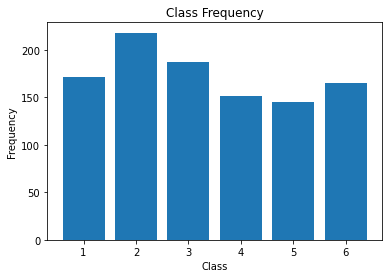

In [12]:
unique, counts = np.unique(data["Range"], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [13]:
# data = data[data["Range"] <= 7]
# data

In [14]:
data.Range.isna().sum()

0

In [15]:
data.dropna(inplace =True)

In [16]:
data[["WrittenSales", "Range"]]

,WrittenSales,Range
0,267388.65,2
1,668799.75,5
2,671177.75,5
3,265077.82,2
4,161678.91,1
...,...,...
1032,1976177.99,6
1033,1211572.83,6
1034,1057772.56,6
1035,1353736.67,6


In [17]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

In [18]:
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


In [19]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

# Train - Test Split

In [20]:
y = data.Range.astype(int).values

X = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1).values

X_df = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1)

In [21]:
y.shape,X.shape

((1037,), (1037, 100))

In [22]:
# # %% train test split
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Training target statistics: Counter({2: 150, 3: 130, 1: 120, 6: 118, 4: 105, 5: 102})
Testing target statistics: Counter({2: 68, 3: 57, 1: 51, 6: 47, 4: 46, 5: 43})
Number transactions X_train dataset:  (725, 100)
Number transactions y_train dataset:  (725,)
Number transactions X_test dataset:  (312, 100)
Number transactions y_test dataset:  (312,)


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling

In [24]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of labels': {}".format(Counter(y_train)))

# oversample = SMOTE()
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [25]:
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(Counter(y_train_res)))

## Applying PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [28]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))

 3 nn score: 0.2980769230769231 


In [29]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [30]:
param_dict = {
    "leaf_size":list(range(1,50)),
    "n_neighbors":list(range(1,300)),
    "p":[1,2]
}

In [31]:
clf = GridSearchCV(knn, 
                   param_grid = param_dict,
                   cv=5)

clf.fit(X_train, y_train.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [32]:
clf.best_params_

{'leaf_size': 3, 'n_neighbors': 1, 'p': 1}

In [33]:
clf.best_estimator_

KNeighborsClassifier(leaf_size=3, n_neighbors=1, p=1)

In [34]:
knn1 = KNeighborsClassifier(**clf.best_params_)

knn1.fit(X_train, y_train.ravel())

KNeighborsClassifier(leaf_size=3, n_neighbors=1, p=1)

In [35]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
# X_train = X_train_res.T
# X_test = X_test.T
# y_train = y_train_res.T
# y_test = y_test.T

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (725, 2)
X_test:  (312, 2)
y_train:  (725,)
y_test:  (312,)


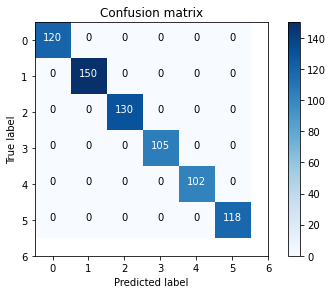

In [37]:
y_train_pre = knn1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train)
class_names = [0,1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [38]:
print(classification_report(y_train, knn1.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      0.79      0.88       120
           2       1.00      0.79      0.88       150
           3       1.00      0.82      0.90       130
           4       1.00      0.86      0.92       105
           5       0.99      0.75      0.86       102
           6       0.50      1.00      0.66       118

    accuracy                           0.83       725
   macro avg       0.91      0.84      0.85       725
weighted avg       0.92      0.83      0.85       725



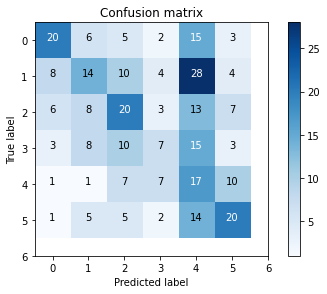

In [39]:
y_pre = knn1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [40]:
print(classification_report(y_test, knn1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.51      0.39      0.44        51
           2       0.33      0.21      0.25        68
           3       0.35      0.35      0.35        57
           4       0.28      0.15      0.20        46
           5       0.17      0.40      0.23        43
           6       0.43      0.43      0.43        47

    accuracy                           0.31       312
   macro avg       0.34      0.32      0.32       312
weighted avg       0.35      0.31      0.32       312



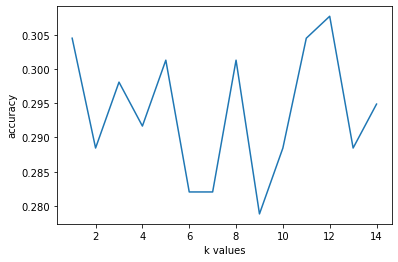

In [42]:
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
# !pip install mlxtend

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

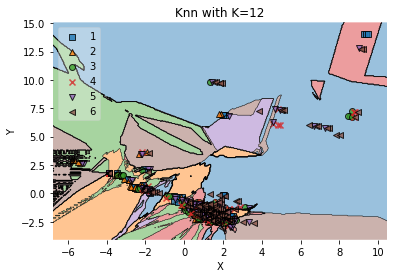

In [44]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision region
plot_decision_regions(X_train, y_train, clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(12))
plt.show()